In [1]:
import numpy as np
import elfi
import matplotlib.pyplot as plt
from elfi.examples import owl
from elfi.methods.bsl import pre_sample_methods, pdf_methods

In [2]:
m = owl.get_model(seed_obs=123, observed=False)

feature_names = ['hs_S', 'lr_S', 'short_step_S', 'start_end_S', 'cum_dist_S',
            'dir_dist_S', 'convex_hull_S', 'hist_S', 'rsc_S']



In [3]:
rho = 2.0
k = 1.5
tau = 1.0
lmda_r = 5.0
params = {'k': k, 'lmda_r': lmda_r, 'rho': rho, 'tau': tau}

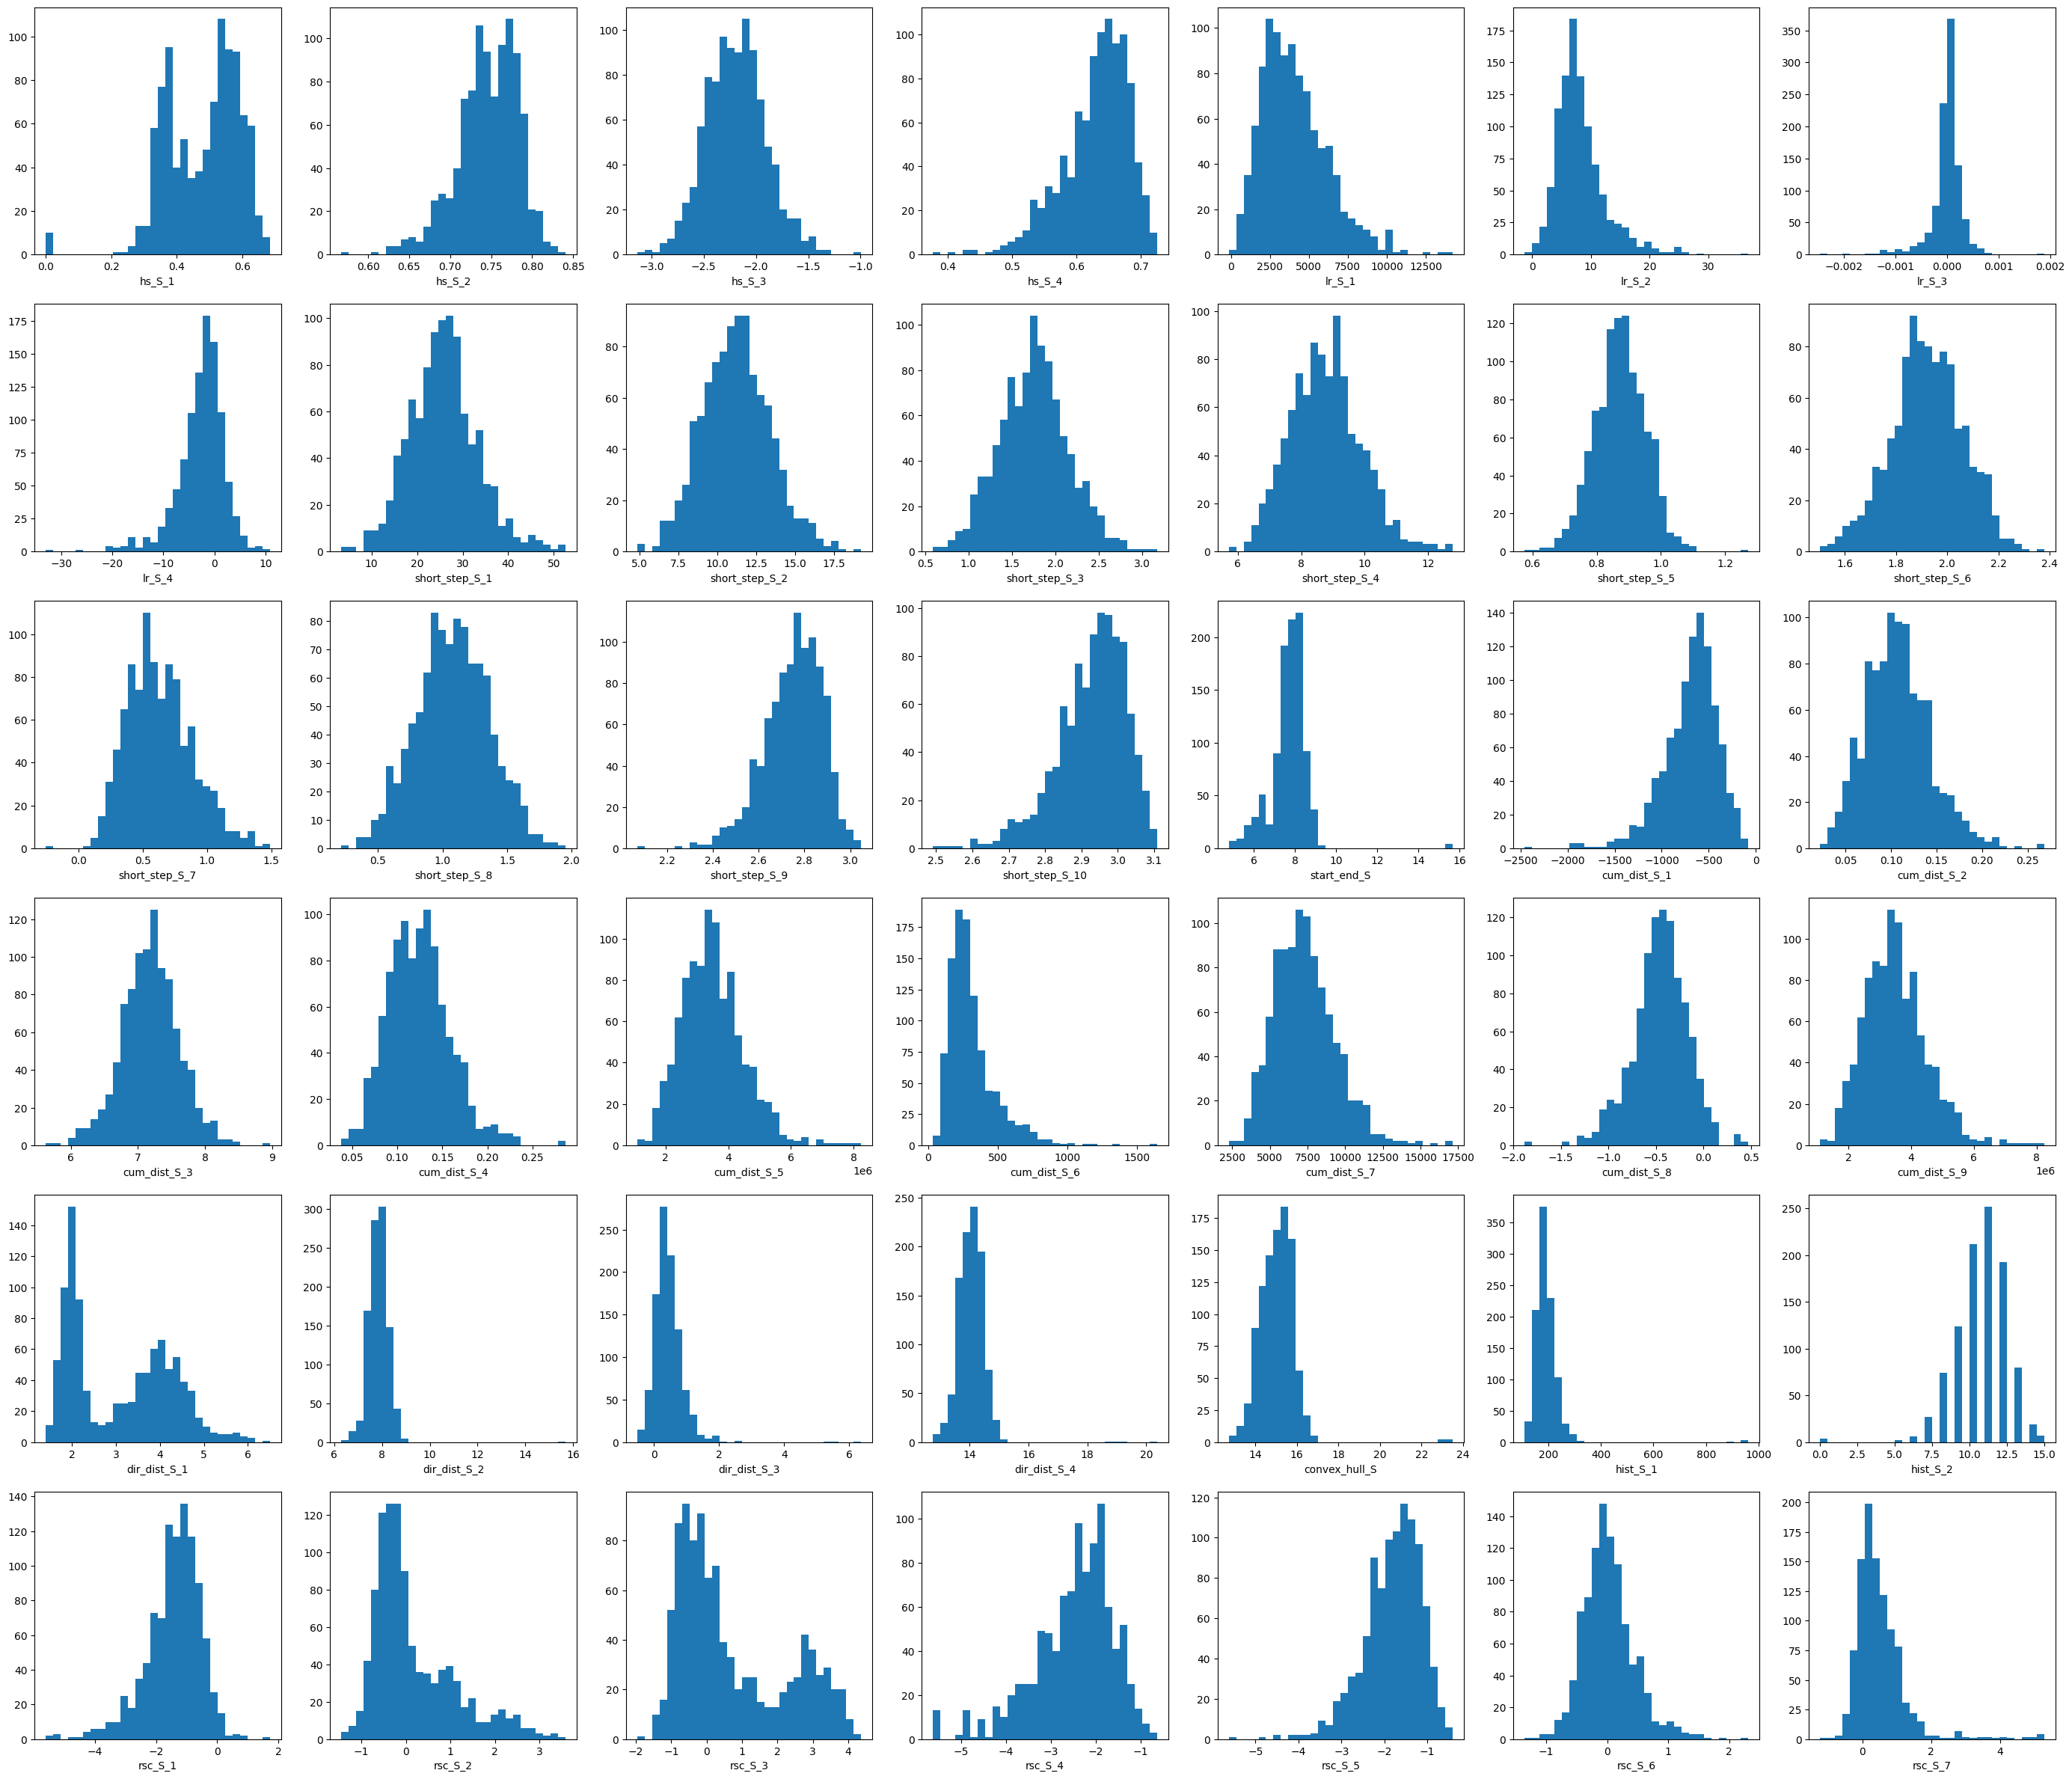

In [4]:
nsim = 1000
seed = 123
pre_sample_methods.plot_features(m, params, nsim, feature_names, seed=seed)
plt.savefig("owl_features_nsim1000.png")

In [7]:
# NOTE: GET VI FOR ABC MAHALANOBIS

theta = params
model = m
seed = 123
n_sim = 5000
params = theta if isinstance(theta, dict) else dict(zip(model.parameter_names, theta))
feature_names = [feature_names] if isinstance(feature_names, str) else feature_names
ssx = model.generate(n_sim, outputs=feature_names, with_values=params, seed=seed)


 /Users/ryankelly/python_projects/elfi/elfi/examples/owl.py:448: RuntimeWarning:invalid value encountered in log


In [17]:
for value in ssx.values():
    print(value.shape)

(5000, 7)
(5000, 4)
(5000, 2)
(5000, 4)
(5000, 1)
(5000, 1)
(5000, 4)
(5000, 10)
(5000, 9)


In [36]:
ssx.keys()

dict_keys(['rsc_S', 'hs_S', 'hist_S', 'dir_dist_S', 'convex_hull_S', 'start_end_S', 'lr_S', 'short_step_S', 'cum_dist_S'])

In [34]:
ssx_np = np.concatenate(list(ssx.values()), axis=1)
cov_mat = np.cov(ssx_np.T)
inv_cov_mat = np.linalg.inv(cov_mat)

In [35]:
import pickle as pkl
with open("owl_inv_cov_mat.pkl", "wb") as f:
    pkl.dump(inv_cov_mat, f)

In [ ]:
rej_abc = elfi.Rejection(m['d'], batch_size=1)

N = 100
sample_rej_abc = rej_abc.sample(N, quantile=0.1)


seed: 238653488
seed: 915902670---------------------------------------------] 0.1% Complete
seed: 876008067---------------------------------------------] 0.2% Complete
seed: 661677358---------------------------------------------] 0.3% Complete
seed: 23819968----------------------------------------------] 0.4% Complete
seed: 758981752---------------------------------------------] 0.5% Complete
seed: 24144184----------------------------------------------] 0.6% Complete
seed: 357869033---------------------------------------------] 0.7% Complete
seed: 604178554---------------------------------------------] 0.8% Complete
seed: 742803846---------------------------------------------] 0.9% Complete
seed: 456189300---------------------------------------------] 1.0% Complete
seed: 437640768---------------------------------------------] 1.1% Complete
seed: 41550358----------------------------------------------] 1.2% Complete
seed: 273597889---------------------------------------------] 1.3% Compl

 /Users/ryankelly/python_projects/elfi/elfi/examples/owl.py:378: RuntimeWarning:invalid value encountered in log


seed: 272365713===========================------------------] 64.5% Complete
seed: 306073387===========================------------------] 64.6% Complete
seed: 836790756===========================------------------] 64.7% Complete
seed: 765657277===========================------------------] 64.8% Complete
seed: 45618236============================------------------] 64.9% Complete
seed: 911688108===========================------------------] 65.0% Complete
seed: 910122145===========================------------------] 65.1% Complete
seed: 990479258===========================------------------] 65.2% Complete
seed: 948793645===========================------------------] 65.3% Complete
seed: 822634403===========================------------------] 65.4% Complete
seed: 356207180===========================------------------] 65.5% Complete
seed: 73090676============================------------------] 65.6% Complete
seed: 587086670===========================------------------] 65.7% Complete

 /Users/ryankelly/python_projects/elfi/elfi/examples/owl.py:378: RuntimeWarning:invalid value encountered in log


seed: 142828579========================================-----] 90.5% Complete
seed: 339364330========================================-----] 90.6% Complete
seed: 226756197========================================-----] 90.7% Complete
seed: 572503302========================================-----] 90.8% Complete
seed: 433677154========================================-----] 90.9% Complete
seed: 484056087========================================-----] 91.0% Complete
seed: 450511750========================================-----] 91.1% Complete
seed: 626300013========================================-----] 91.2% Complete
seed: 952120644========================================-----] 91.3% Complete
seed: 904053710========================================-----] 91.4% Complete
seed: 435846875========================================-----] 91.5% Complete
seed: 79267931=========================================-----] 91.6% Complete
seed: 131968961========================================-----] 91.7% Complete

 /Users/ryankelly/python_projects/elfi/elfi/examples/owl.py:378: RuntimeWarning:invalid value encountered in log


seed: 816918819
seed: 321651853=========================================----] 93.0% Complete
seed: 939617277=========================================----] 93.1% Complete
seed: 574162086=========================================----] 93.2% Complete
seed: 190533724=========================================----] 93.3% Complete
seed: 674310392=========================================----] 93.4% Complete
seed: 859534682=========================================----] 93.5% Complete
seed: 49597377==========================================----] 93.6% Complete
seed: 894044============================================----] 93.7% Complete
seed: 737873448=========================================----] 93.8% Complete
seed: 264379940=========================================----] 93.9% Complete
seed: 830957411==========================================---] 94.0% Complete
seed: 296631355==========================================---] 94.1% Complete
seed: 80995878===========================================---

In [ ]:
sample_rej_abc

Method: Rejection
Number of samples: 100
Number of simulations: 1000
Threshold: 2.94e+06
Parameter                Mean               2.5%              97.5%
k:                      2.003              0.241              3.859
lmda_r:                16.172              3.593             28.864
rho:                    2.065              0.149              4.340
tau:                    1.899              0.449              3.372
